In [16]:
import pandas as pd

# Load the data
file_path = 'results_temp/comparison_fixedy_200.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and a summary of the data
pd.set_option('display.max_rows', 24)
data


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,optimal_outcome_actions
0,1099.592442,1996.918321,1267.417779,53,2203.571460
1,1572.418280,1784.746873,1330.566692,21,2151.988521
2,1677.822129,1941.861022,1398.337675,18,2178.477664
3,1545.184851,1812.801283,1301.086110,87,2032.747722
4,1645.577015,1708.588924,1484.999443,97,2132.608294
...,...,...,...,...,...
76,1692.891408,1733.134041,1621.249022,21,2078.511842
77,1836.228152,2062.468853,1370.937744,97,2236.613528
78,1684.167655,1771.342235,1436.952512,97,2146.577631
79,1828.643560,1596.632386,1302.881197,96,2181.721776


/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

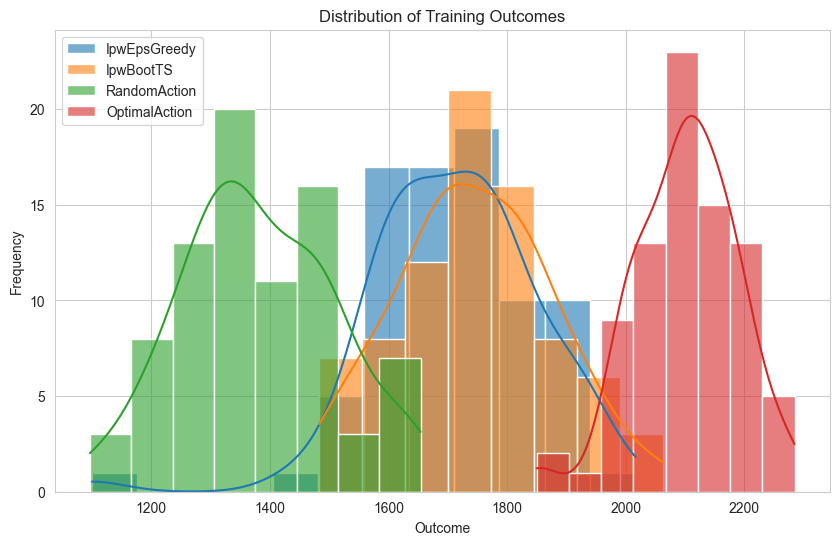

(-1.600260919682944, 0.11151340361054246)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Set the style of the visualizations
sns.set_style("whitegrid")

# Plot the distributions of both methods
plt.figure(figsize=(10, 6))
sns.histplot(data['IpwEpsGreedy'],  kde=True, label='IpwEpsGreedy', alpha=0.6)
sns.histplot(data['IpwBootTS'],  kde=True, label='IpwBootTS', alpha=0.6)
sns.histplot(data['RandomAction'], kde=True, label='RandomAction', alpha=0.6)
sns.histplot(data['optimal_outcome_actions'],  kde=True, label='OptimalAction', alpha=0.6)

plt.title('Distribution of Training Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Conduct a two-sample t-test to compare the means
t_stat, p_value = ttest_ind(data['IpwEpsGreedy'], data['IpwBootTS'])

t_stat, p_value


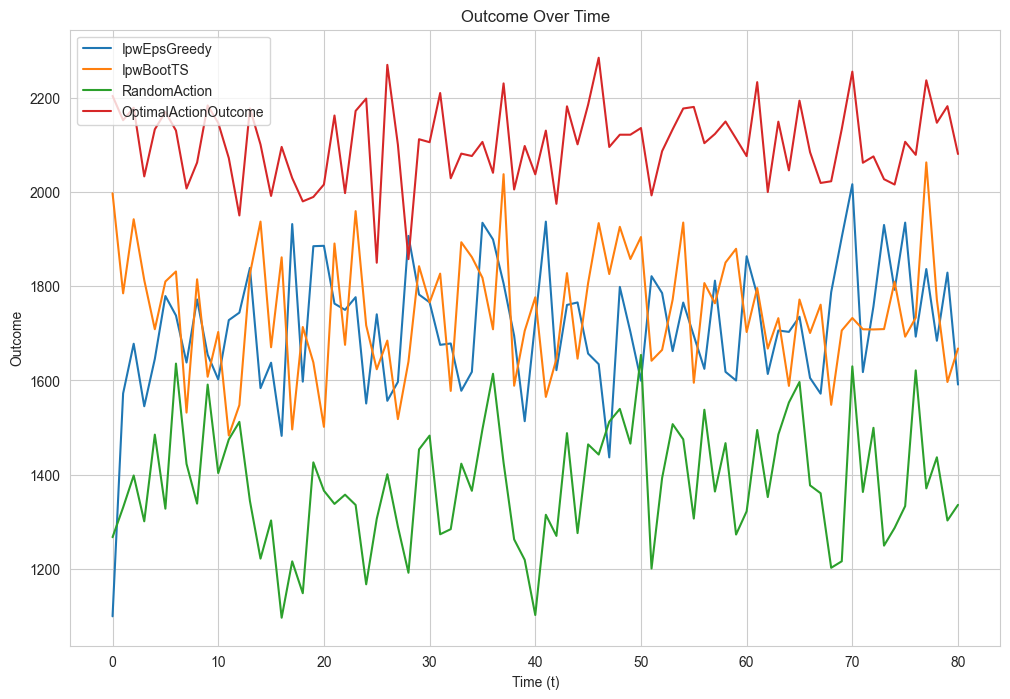

In [18]:
import matplotlib.pyplot as plt

# Assuming row index as the time variable for plotting
# Let's plot a few selected columns to keep the plot readable

plt.figure(figsize=(12, 8))

# Plotting selected columns
plt.plot(data.index, data['IpwEpsGreedy'], label='IpwEpsGreedy')
plt.plot(data.index, data['IpwBootTS'], label='IpwBootTS')
plt.plot(data.index, data['RandomAction'], label='RandomAction')
plt.plot(data.index, data['optimal_outcome_actions'], label='OptimalActionOutcome')

plt.title('Outcome Over Time')
plt.xlabel('Time (t)')
plt.ylabel('Outcome')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()


In [19]:
# Modifying the values by subtracting the current value from the optimal action value
data_modified = data.copy()  # Creating a copy to modify values

# Subtracting the current values from the optimal action value for selected columns
data_modified['IpwEpsGreedy_diff'] = data['optimal_outcome_actions'] - data['IpwEpsGreedy']
data_modified['IpwBootTS_diff'] = data['optimal_outcome_actions'] - data['IpwBootTS']
data_modified['RandomAction_diff'] = data['optimal_outcome_actions'] - data['RandomAction']


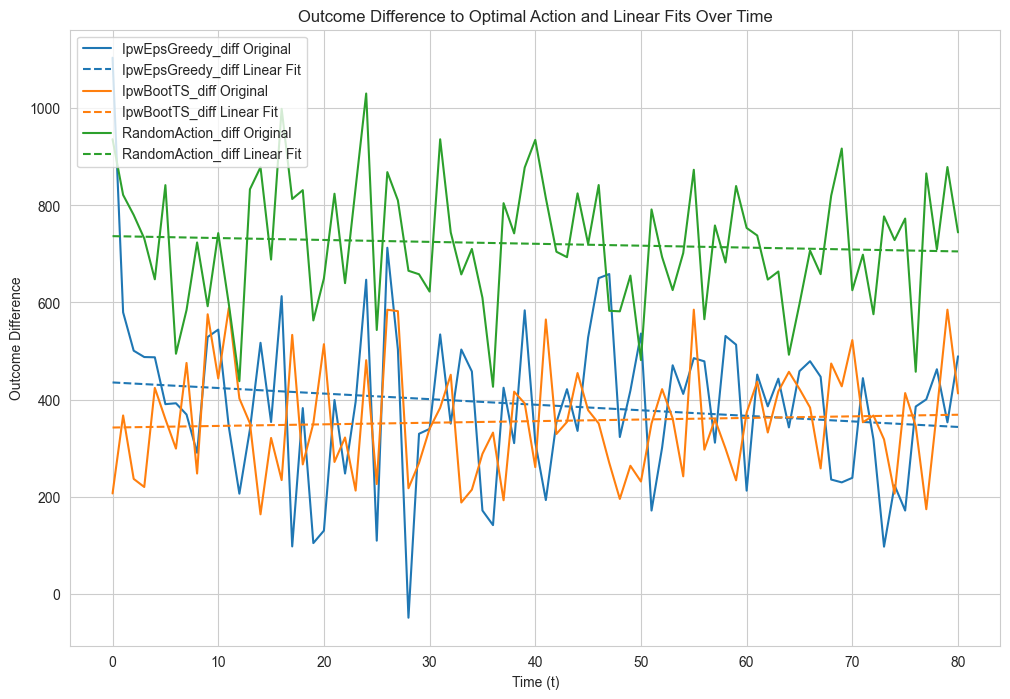

{'IpwEpsGreedy_diff': {'slope': -1.1456037310166387,
  'intercept': 435.22611693549254},
 'IpwBootTS_diff': {'slope': 0.328811477258033,
  'intercept': 342.4109695452155},
 'RandomAction_diff': {'slope': -0.39287496501228497,
  'intercept': 736.524574344171}}

In [20]:
from sklearn.linear_model import LinearRegression
import numpy as np


# Preparing data for linear regression
X = data_modified.index.values.reshape(-1, 1)  # Time as independent variable

# Initialize linear regression model
model = LinearRegression()

# Dictionary to store models for each column
models = {}

# Columns to fit linear models on
columns = ['IpwEpsGreedy_diff', 'IpwBootTS_diff', 'RandomAction_diff']

# Fitting linear models and storing coefficients
for col in columns:
    y = data_modified[col].values.reshape(-1, 1)  # Value differences as dependent variable
    model.fit(X, y)
    models[col] = {'slope': model.coef_[0][0], 'intercept': model.intercept_[0]}
    
colors = {
    'IpwEpsGreedy_diff': '#1f77b4',  # muted blue
    'IpwBootTS_diff': '#ff7f0e',    # safety orange
    'RandomAction_diff': '#2ca02c', # cooked asparagus green
    'OptimalOutcomePolicy_diff': '#d62728'  # brick red
}

# Plotting the original data and linear fits
plt.figure(figsize=(12, 8))

for col in columns:
    plt.plot(data_modified.index, data_modified[col], label=f'{col} Original', color = colors[col])
    # Generating linear fit line
    linear_fit = models[col]['slope'] * data_modified.index + models[col]['intercept']
    plt.plot(data_modified.index, linear_fit, label=f'{col} Linear Fit', linestyle='--', color = colors[col])

plt.title('Outcome Difference to Optimal Action and Linear Fits Over Time')
plt.xlabel('Time (t)')
plt.ylabel('Outcome Difference')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

models
